# ML Algorithm Performance Metrics

## Algorithm Evaluation Metrics

We need more input datasets:
* For CLASSIFICATION metrics: we use the Pima Indians onset of diabetes dataset
* For REGRESSION metrics: we use the Boston House Price dataset 


We do not focus on modelling utself, in this notebook, so we use ***Logistic Regression*** for the classification problem and ***Linear Regression*** for the regression problems. 

A 10-fold CV test harness is used to demonstrate each metric (because this is a  likely scenario you will use when employing different algorithm evaluation metrics)

More about ML algorithm performance metrics supported by scikit-learn can be found [here](http://scikit-learn.org/stable/modules/model_evaluation.html) on the page "Model evaluation: quantifying the quality of predictions". 

# CLASSIFICATION Metrics

## 0. Import the data

In [73]:
import pandas as pd

url = 'https://raw.githubusercontent.com/dbonacorsi/AMLBas2122/main/datasets/pima-indians-diabetes.data.csv'

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names)
data

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


We will review how to use the following metrics:
* [CLAS-1] Classification Accuracy
* [CLAS-2] Logarithmic Loss
* [CLAS-3] Area Under ROC Curve
* [CLAS-4] Confusion Matrix
* [CLAS-5] Classification Report

## [CLAS-1] Classification Accuracy

Classification accuracy is **the number of correct predictions made as a ratio of all predictions made**. 

This is the most common evaluation metric for classification problems, and it is also often the most misused.

Below is an example of calculating classification accuracy.

In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#
from sklearn.linear_model import LogisticRegression

In [75]:
array = data.values
X = array[:,0:8]
Y = array[:,8]

In [76]:
seed = 7

We do k-fold CV.

In [96]:
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
model = LogisticRegression(solver='lbfgs', max_iter=5000)

In [97]:
# Cross Validation Classification Accuracy
scoring = 'accuracy'                                             # <--- 
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.772 (0.050)


You can see that the accuracy ratio is reported: we built a model that is approximately 78% accurate.

## <font color='red'>Exercise 1</font>

Measure the time it takes to run the previous cell, by running k-fold CV with different k's, and compare timing and accuracies obtained.

## <font color='green'>Solution 1</font>

In [98]:
# enter your code here

## [CLAS-2] Logarithmic Loss (aka "logloss")

Logarithmic loss (or logloss) is **a performance metric for evaluating the predictions of probabilities of membership to a given class**.

Below is an example of calculating logloss for Logistic regression predictions on the Pima Indians onset of diabetes dataset.


In [99]:
# Cross Validation Classification LogLoss
scoring = 'neg_log_loss'                      #<---
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.485 (0.057)


Smaller logloss is better with 0 representing a perfect logloss. The
measure is inverted to be ascending when using the `cross_val_score()` function (see the documentation).

## [CLAS-3] Area Under ROC Curve

Area under ROC Curve (or AUC for short) is **a performance metric for binary classification problems**. 

ROC can be broken down into **sensitivity** and **specificity**. A binary classification problem is really a trade-off between sensitivity and specificity.
* Sensitivity is the true positive rate (TPR) also called the Recall. It is the number of instances from the positive (first) class that actually predicted correctly.
* Specificity is also called the true negative rate (TNR). It is the number of instances from the
negative (second) class that were actually predicted correctly. 

The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model that is as good as random. 

The example below provides a demonstration of calculating AUC.

In [100]:
# Cross Validation Classification ROC AUC
scoring = 'roc_auc'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.829 (0.047)


You can see the AUC is relatively close to 1 and greater than 0.5, suggesting some skills in the predictions.

## [CLAS-4] Confusion Matrix

The confusion matrix is **a handy (and more informative) presentation of the accuracy of a model with two or more classes**. 

The table presents predictions on the x-axis and accuracy outcomes on the y-axis. The cells of the table are the number of predictions made by a ML algorithm. See the frontal lectures for some examples.

Below is an example of calculating a confusion matrix for a set of predictions by a Logistic Regression on the Pima Indians onset of diabetes dataset.

There are (at least) 2 different ways to do so
*   NOTE: to compare these two approaches and avoid to do mistakes, we need to re-execute (or just write again for clarity) some cells above - unnecessary if you do just one method, of course..


### First method

The first is not to rely on `cross_val_score` at all: there is no option to have a confusion matrix as scoring function in its call after having done the k-fold CV, so one way is not to do CV at all,  opt for a static splitting and validation, then use `confusion_matrix` directly.

In [101]:
from sklearn.model_selection import train_test_split      # <---
from sklearn.metrics import confusion_matrix              # <---

In [102]:
test_size = 0.33

# Cross Validation Classification Confusion Matrix
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='lbfgs', max_iter=500)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix1 = confusion_matrix(Y_test, predicted)              # <---
print(matrix1)


[[142  20]
 [ 34  58]]


Although the array is printed without headings, you can see that the majority of the predictions fall on the diagonal line of the matrix (which are correct predictions).

### Second method

The second is keep doing k-fold CV, but to drop the use of `cross_val_score` in favour of `cross_val_predict`.


In [103]:
from sklearn.model_selection import KFold                 # <---
from sklearn.model_selection import cross_val_predict     # <---
from sklearn.metrics import confusion_matrix              # <---

In [104]:
kfold = KFold(n_splits=4, random_state=seed, shuffle=True)
model = LogisticRegression(solver='lbfgs', max_iter=300)

predicted = cross_val_predict(model, X, Y, cv=kfold)    # <--- NOTE: no 'scoring'
matrix2 = confusion_matrix(Y, predicted)
print(matrix2)

[[443  57]
 [119 149]]


Same as above: the majority of the predictions fall on the diagonal line of the matrix. Good.

Let's make a couple of plots. We discuss later.

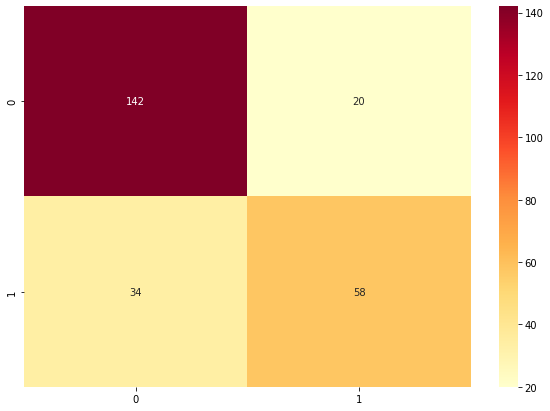

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
#
df_cm = pd.DataFrame(matrix1)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap="YlOrRd", fmt="d")

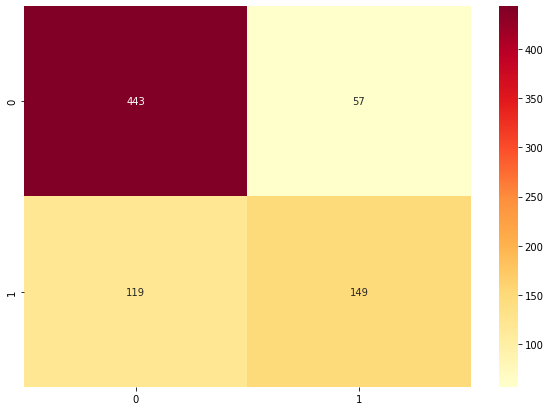

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
#
df_cm = pd.DataFrame(matrix2)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap="YlOrRd", fmt="d")

## <font color='red'>Exercise 2</font>

The 2 matrices are not the same, though, aren't they? So: are the 2 results, content-wise, the same? or comparable?


## <font color='green'>Solution 2</font>

In [107]:
# write your code here

## [CLAS-5] Classification Report

There is also **a convenience report provided by the scikit-learn library** when working on classification problems to give you a quick idea of the accuracy of a model using a number of measures. The `classification report()` function displays the precision, recall, F1-score and support for each class. 

The example below demonstrates the report on the binary classification problem.

In [108]:
from sklearn.metrics import classification_report               # <---

In [115]:
test_size = 0.33
seed = 7

# Cross Validation Classification Report
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
    random_state=seed)
model = LogisticRegression(solver='lbfgs', max_iter=5000)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)               # <---
print(report)                  

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       162
         1.0       0.74      0.63      0.68        92

    accuracy                           0.79       254
   macro avg       0.78      0.75      0.76       254
weighted avg       0.78      0.79      0.78       254



You can see good prediction and recall for the algorithm.

# REGRESSION Metrics

In the regression examples, we will use the Boston house price dataset, which you can find (original source) [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data), and for your convenience it is already in the github repo of the course.

## 0. Import the data

In [116]:
import pandas as pd

url = 'https://raw.githubusercontent.com/dbonacorsi/AMLBas2122/main/datasets/housing.data.csv'

names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(url, delim_whitespace=True, names=names)
data

#array = dataframe.values
#X = array[:,0:13]
#Y = array[:,13]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Here we will review 3 of the most common metrics for evaluating predictions on regression ML problems:
* [REGR-1] Mean Absolute Error
* [REGR-2] Mean Squared Error
* [REGR-3] $R^2$



## [REGR-1] Mean Absolute Error

The Mean Absolute Error (or MAE) is **the sum of the absolute differences between predictions and actual values**. 

The example below demonstrates calculating mean absolute error on the house dataset.

In [117]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [118]:
# Cross Validation Regression MAE
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearRegression()
#
scoring = 'neg_mean_absolute_error'                                  # <---
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

MAE: -0.337 (0.020)


A value of 0 indicates no error or perfect predictions. Like log-loss, this metric is inverted by
the `cross_val_score()` function.

## [REGR-2] Mean Squared Error

The Mean Squared Error (or MSE) is much like the MAE in that **it provides a gross idea of the magnitude of error**. 


The example below provides a demonstration of calculating MSE.

In [119]:
#num_folds = 10       # a remnant..
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearRegression()
#
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: -0.163 (0.020)


This metric too is inverted so that the results are increasing. 

## [REGR-3] $R^2$ metric

The $R^2$ (or R Squared) metric provides **an indication of the goodness of fit of a set of predictions to the actual values**.



The example below provides a demonstration of calculating the mean $R^2$ for a set of predictions.

In [120]:
# Cross Validation Regression R^2
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearRegression()
#
scoring = 'r2'                                                     # <---
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

R^2: 0.264 (0.102)


You can see the predictions have a poor fit to the actual values with a value closer to zero and less than 0.5.

## Summary

What we did:

* we discovered metrics that you can use to evaluate your ML algorithms. We learned about 3 classification metrics (Accuracy, LogLoss and AUC) and 2 convenience methods for classification prediction results (Confusion Matrix and Classification Report), as well as 3 metrics for regression problems (MAE, MSE, R2).